# Todo

* implement softmax/bad_softmax switch
* 


In [35]:
#!/usr/bin/python
import numpy as np
from os.path import join
from os.path import isdir
from os import mkdir
import sys

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20.0, 4.0)
matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.dpi'] = 400
def prefix(i,zeros):
    s = str(i)
    while(len(s) < zeros):
        s = '0' + s
    return s

EXPERIMENT_NUMBER = 11
if True:
    p = '/home/luka/v/lm1015-tmp'
else:
    p = '/homes/lm1015/v/'
path = join(join(p,'data/2016_06_21/'),prefix(EXPERIMENT_NUMBER,3))
ssv_path = join(path,'numerical_data')
# save_path = join(path,'graphs')
# save_path_pdf = join(save_path,'pdf')

# if not isdir(save_path):
#     mkdir(save_path)

# if not isdir(save_path_pdf):
#     mkdir(save_path_pdf)

x_axis = np.loadtxt(join(ssv_path,'x_axis.ssv'))
lmsq_axis = np.loadtxt(join(ssv_path,'lmsq.ssv'))
cent_axis = np.loadtxt(join(ssv_path,'cross_entropy.ssv'))
accu_axis = np.loadtxt(join(ssv_path,'naive_accuracy.ssv'))
per_au = np.load(join(ssv_path,'per_au_accuracy.npz'))
validation_auac_axis = per_au['validation_metrics']
train_auac_axis = per_au['train_metrics']
threshold_values = per_au['threshold_values']
test_threshold_data = per_au['test_threshold_data']

-
        ,
#     plt.savefig(
#         join(save_path,prefix+'_per_au.png'),dpi=400, additional_artists=art,
#         bbox_inches="tight")
#     plt.savefig(
#         join(save_path_pdf,prefix+'_per_au.pdf'),additional_artists=art,
#         bbox_inches="tight")

# Cost Functions:

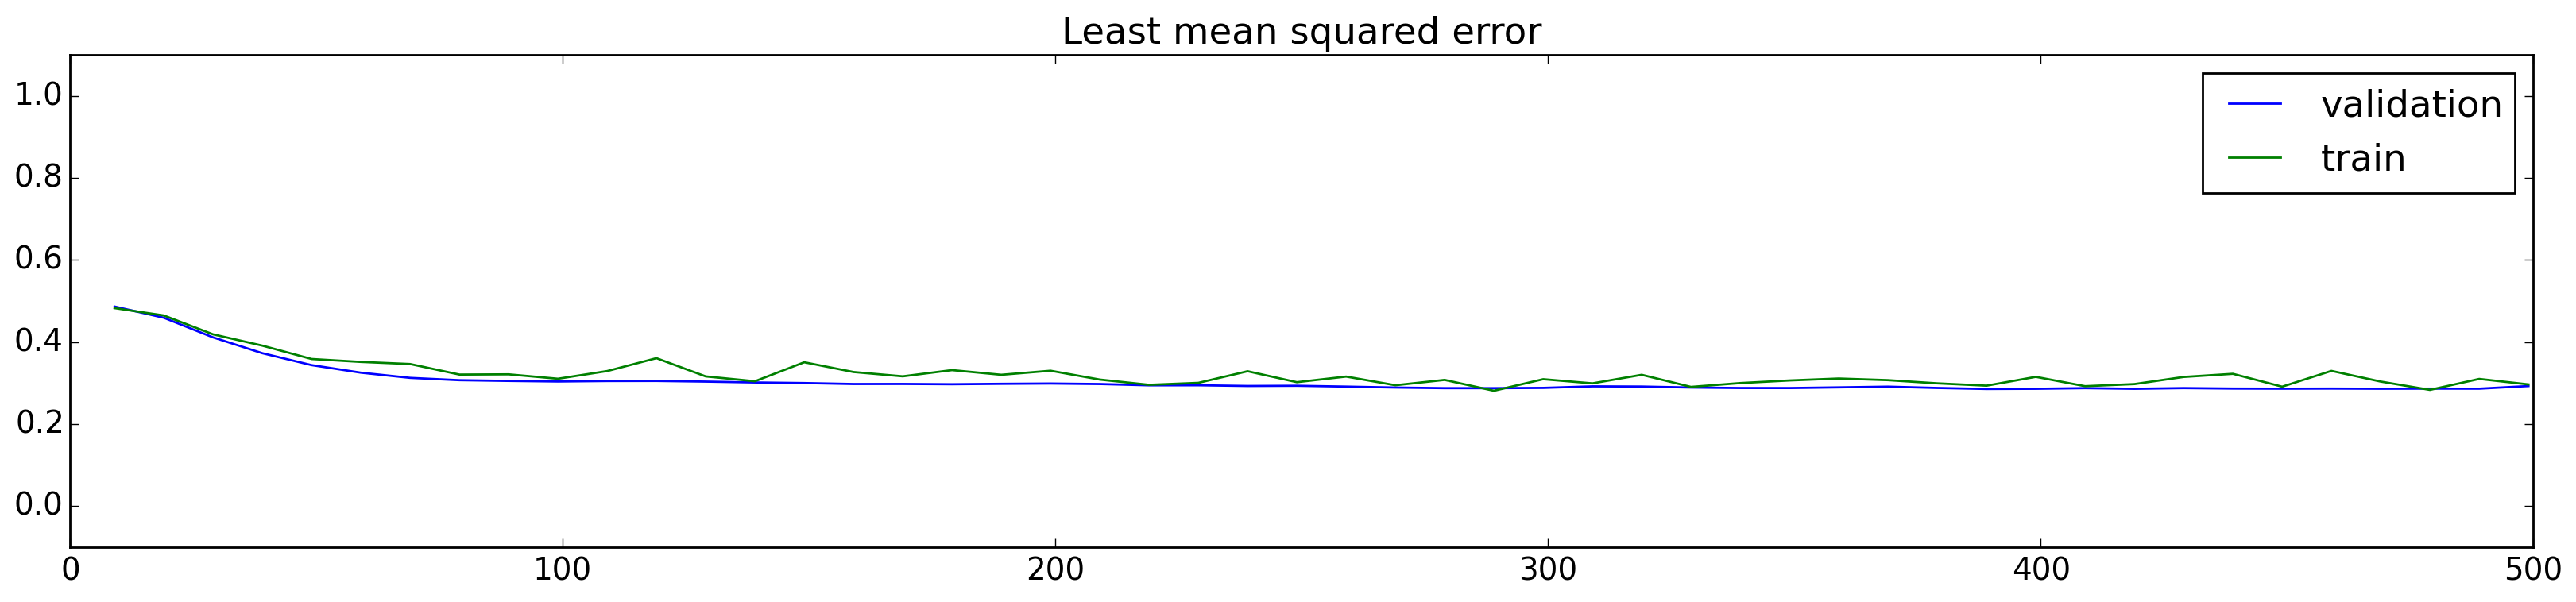

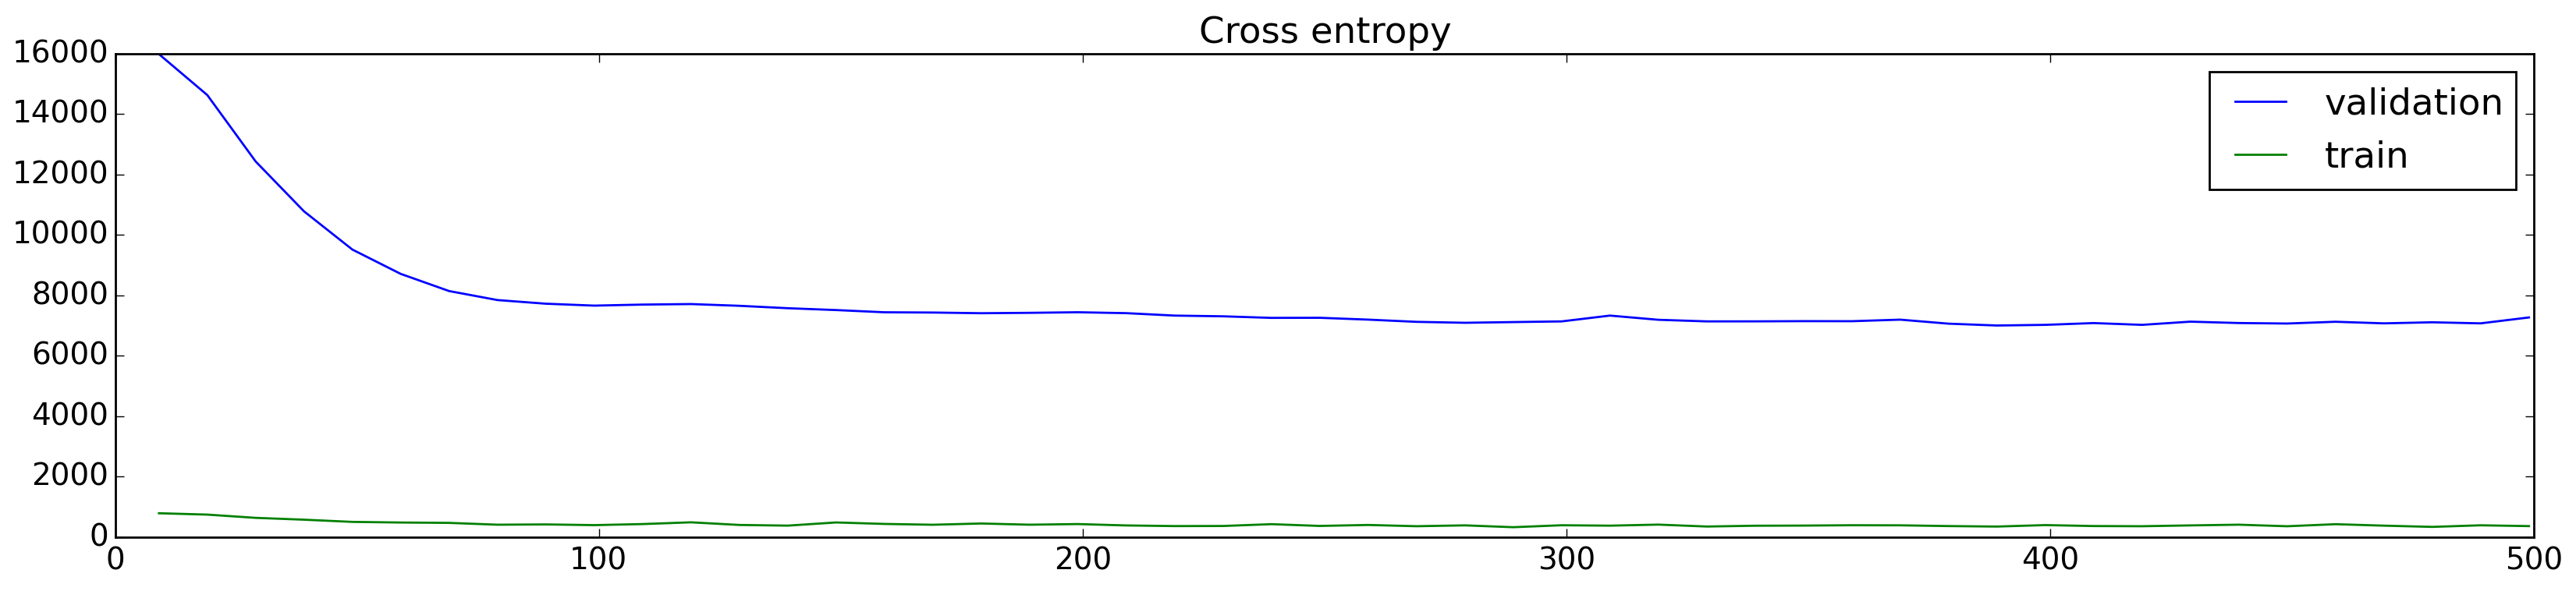

In [65]:
plt.figure()
plt.title('Least mean squared error')
plt.plot(x_axis,lmsq_axis[0,:],label='validation')
plt.plot(x_axis,lmsq_axis[1,:],label='train')
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()
# plt.savefig(join(save_path,'lmsq.png'),dpi=400)
# plt.savefig(join(save_path_pdf,'lmsq.pdf'))

plt.figure()
plt.title('Cross entropy')
plt.plot(x_axis,cent_axis[0,:],label='validation')
plt.plot(x_axis,cent_axis[1,:],label='train')
plt.legend()
# plt.ylim(-1.0,cent_axis.max()+1.0)
plt.show()
# plt.savefig(join(save_path,'cross_entropy.png'),dpi=400)
# plt.savefig(join(save_path_pdf,'cross_entropy.pdf'))



# Test Sets

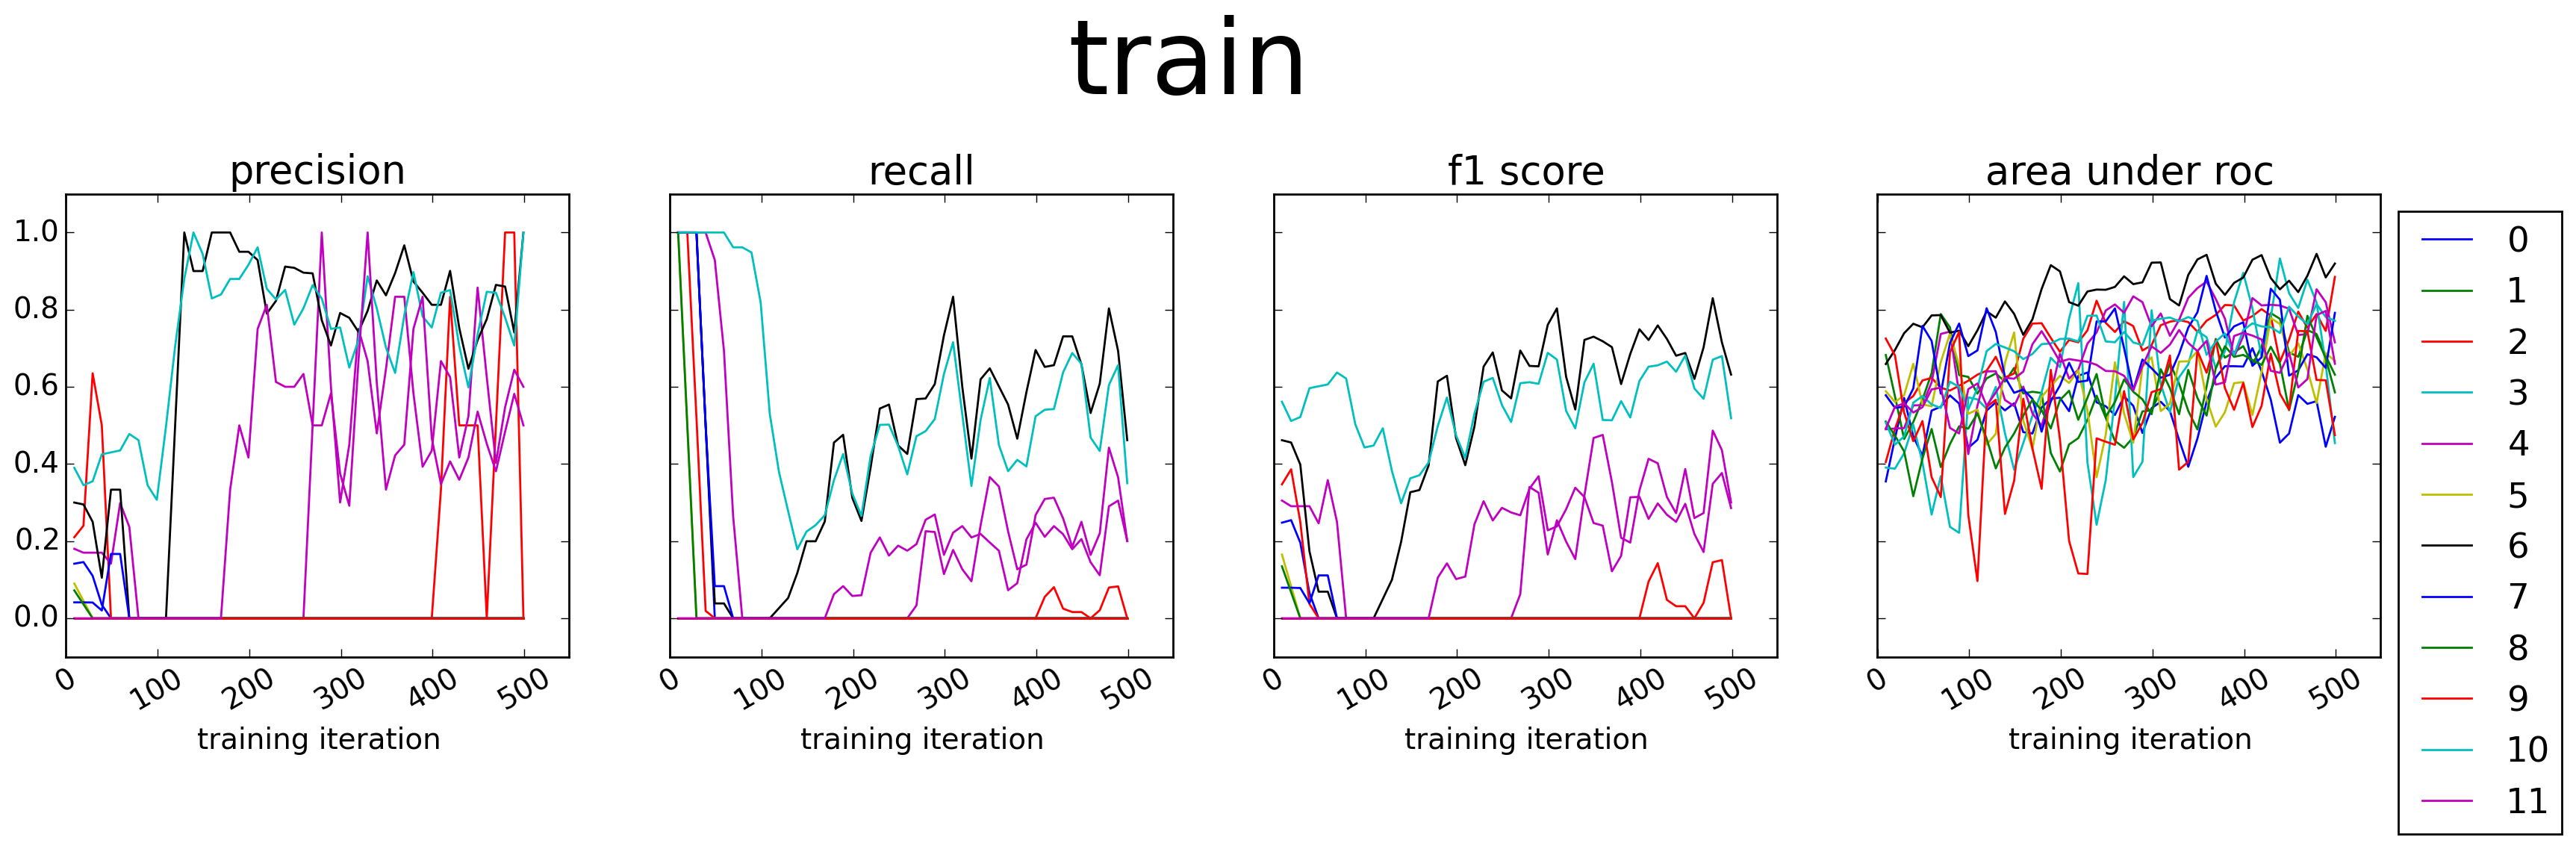

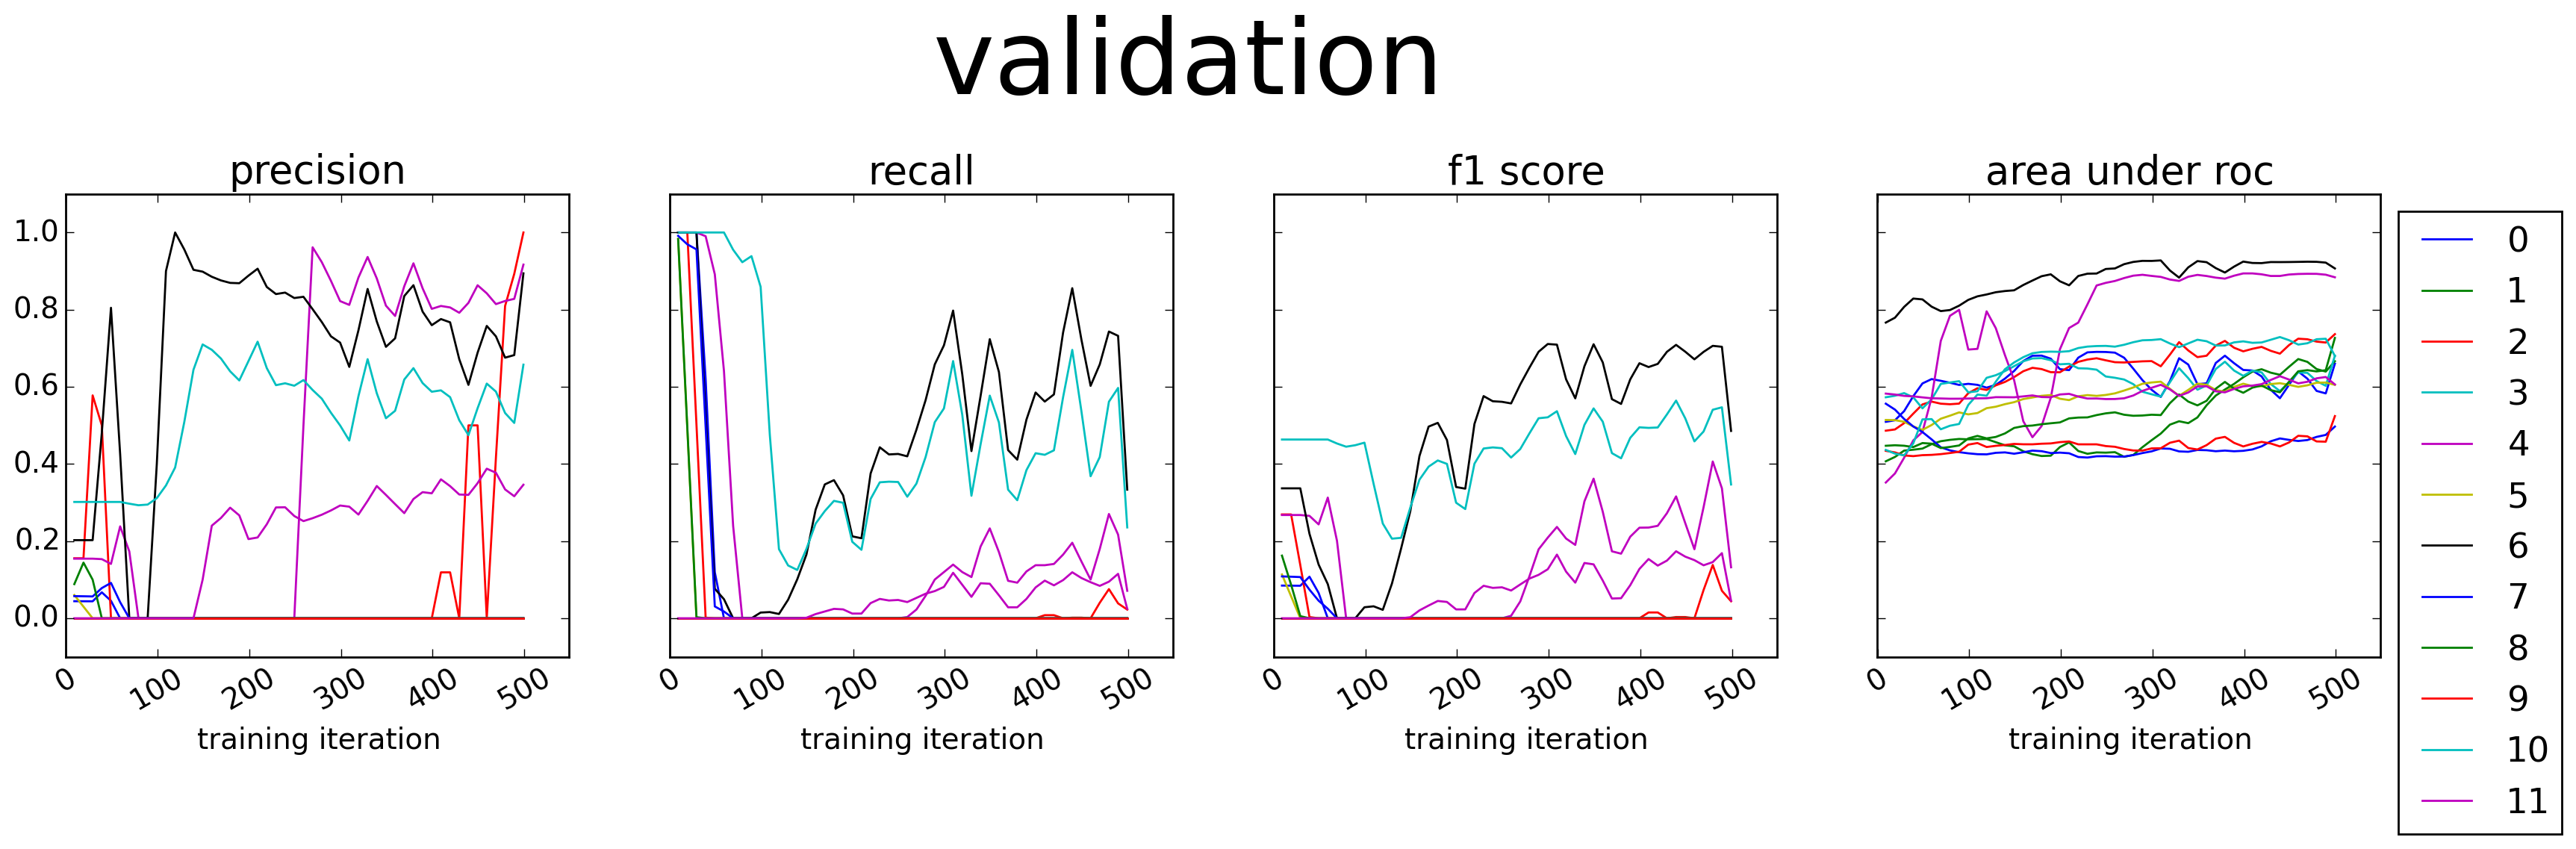

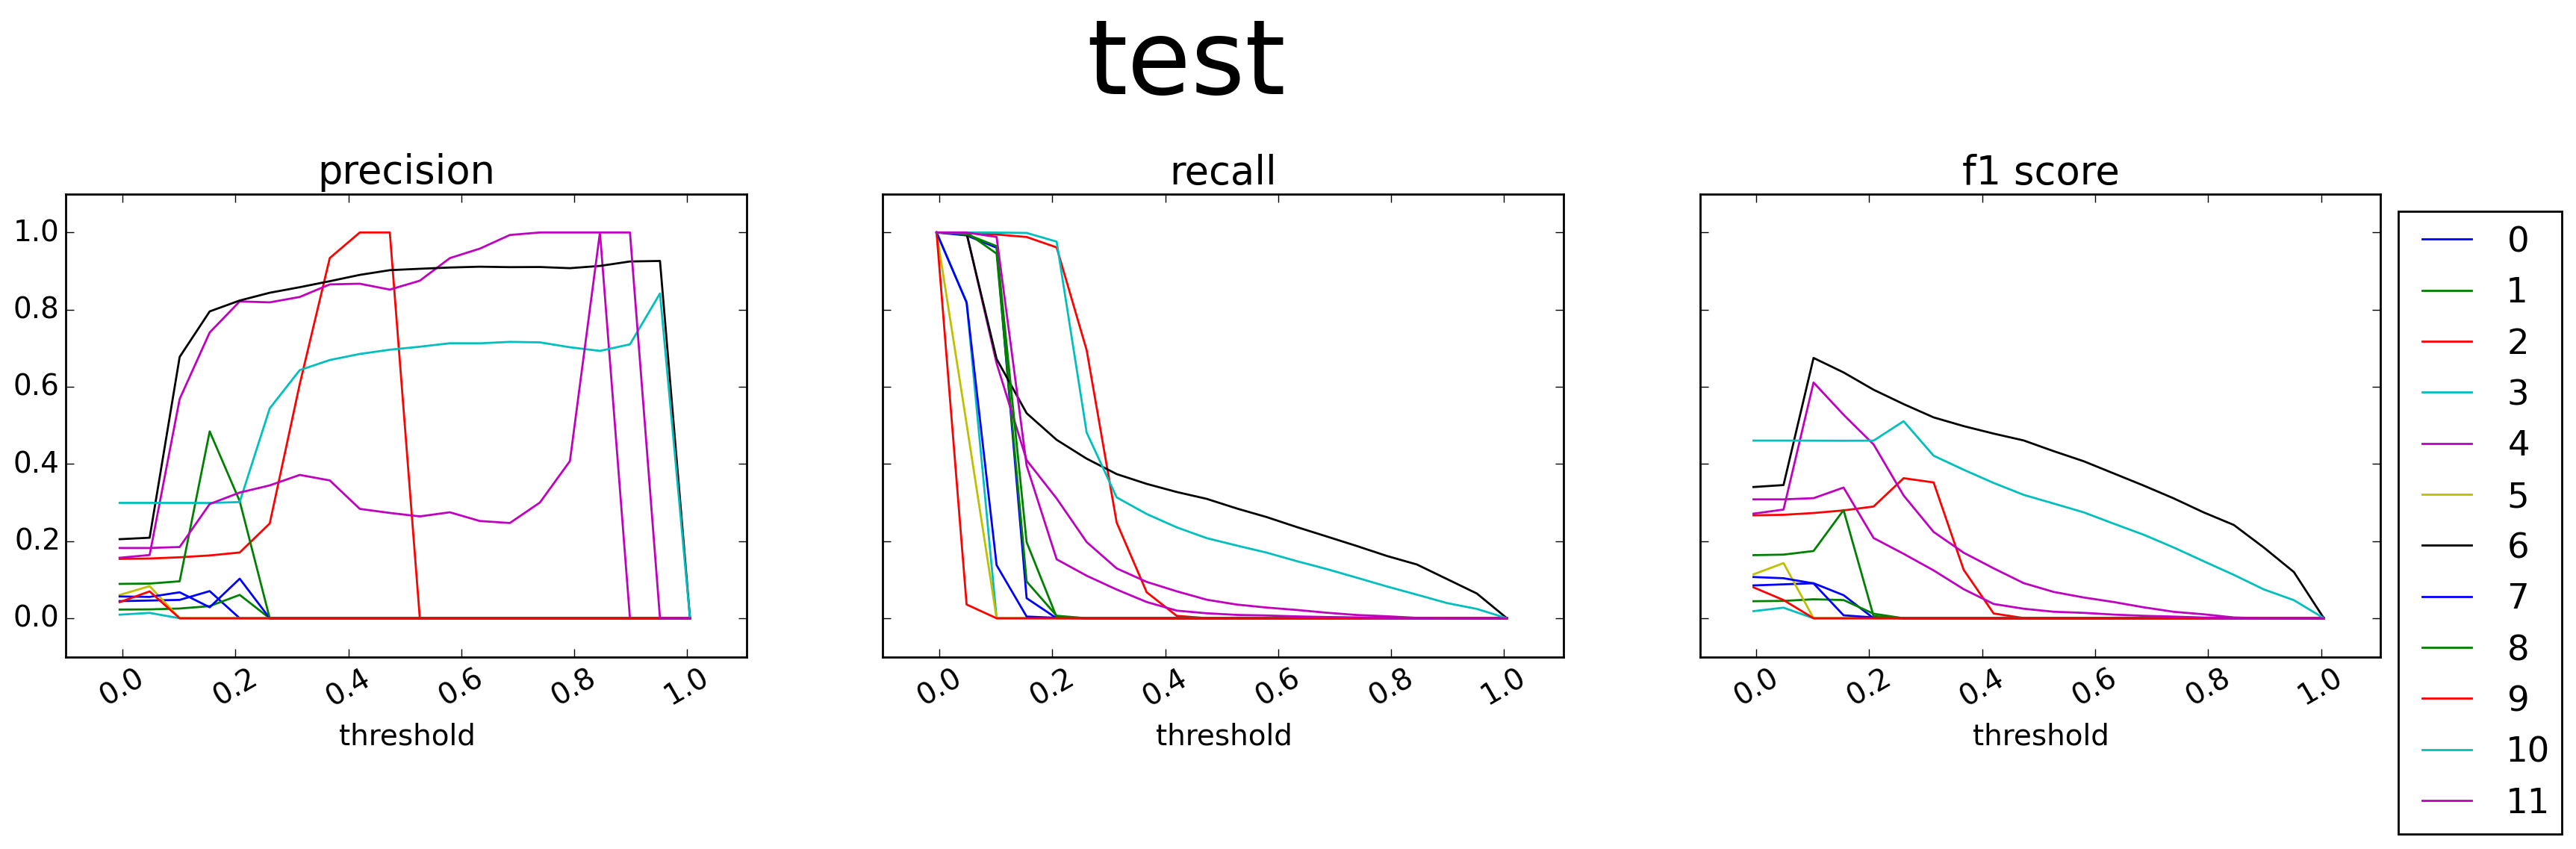

Test ROC values for each class (independant of threshold):
class	roc	roc	f1	p	r
0 	0.63 	poor 	0.09 	0.07 	1.0
1 	0.64 	poor 	0.05 	0.06 	1.0
2 	0.73 	fair 	0.36 	1.0 	1.0
3 	0.66 	poor 	0.03 	0.01 	1.0
4 	0.89 	good 	0.61 	1.0 	1.0
5 	0.6 	fail 	0.14 	0.08 	1.0
6 	0.91 	great 	0.67 	0.93 	1.0
7 	0.49 	fail 	0.11 	0.1 	1.0
8 	0.74 	fair 	0.28 	0.48 	1.0
9 	0.53 	fail 	0.08 	0.07 	1.0
10 	0.68 	poor 	0.51 	0.84 	1.0
11 	0.6 	poor 	0.34 	1.0 	1.0


In [36]:
au(x_axis,train_auac_axis,'train',True)
au(x_axis,validation_auac_axis,'validation',True)
au(threshold_values,test_threshold_data,'test',False)

In [15]:
t = per_au['test_confusion']
print t.shape
i = 5
print 'Test iteration ', i
print t[i].shape
for j in xrange(t[i].shape[0]):
    print 'Class ', j
    for x in xrange(2):
        for y in xrange(2):
            print round(t[i,j,1-x,1-y]/float(t[i,j,:,:].sum()),2),
        print
    print

(20, 12, 2, 2)
Test iteration  5
(12, 2, 2)
Class  0
0.0 0.04
0.0 0.96

Class  1
0.0 0.02
0.0 0.98

Class  2
0.11 0.05
0.33 0.52

Class  3
0.0 0.01
0.0 0.99

Class  4
0.03 0.13
0.01 0.84

Class  5
0.0 0.06
0.0 0.94

Class  6
0.08 0.12
0.02 0.78

Class  7
0.0 0.06
0.0 0.94

Class  8
0.0 0.09
0.0 0.91

Class  9
0.0 0.04
0.0 0.96

Class  10
0.14 0.16
0.12 0.58

Class  11
0.02 0.16
0.04 0.78

